In [18]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [19]:
# Step 2: Load and explore data
df = pd.read_csv('weatherHistory.csv')
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [20]:
# Step 3: Prepare features and labels for HMM
# Use 'Summary' as weather state, 'Temperature (C)' and 'Humidity' as features
df = df.dropna(subset=['Summary', 'Temperature (C)', 'Humidity'])
# Encode weather states
le = LabelEncoder()
df['Weather_encoded'] = le.fit_transform(df['Summary'])
# Prepare features (Temperature and Humidity)
X = df[['Temperature (C)', 'Humidity']].values

In [26]:
# Step 4: Train HMM
n_states = len(le.classes_)
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=40)
model.fit(X)

GaussianHMM(n_components=27, n_iter=40)

In [27]:
# Step 5: Predict hidden states
hidden_states = model.predict(X)
predicted_weather = le.inverse_transform(hidden_states)


In [28]:
# Step 6: Show a sample of actual vs predicted
print("Actual:", df['Summary'].head(10).values)
print("Predicted:", predicted_weather[:10])

Actual: ['Partly Cloudy' 'Partly Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Mostly Cloudy' 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy'
 'Partly Cloudy' 'Partly Cloudy']
Predicted: ['Windy and Foggy' 'Breezy and Overcast' 'Breezy and Overcast'
 'Breezy and Overcast' 'Breezy and Overcast' 'Breezy and Overcast'
 'Breezy and Overcast' 'Breezy and Overcast' 'Windy and Dry' 'Dry']


In [29]:
# Step 7: Accuracy (optional, since HMM is unsupervised)
accuracy = np.mean(predicted_weather == df['Summary'].values)
print(f"Prediction Accuracy: {accuracy:.2f}")

Prediction Accuracy: 0.04


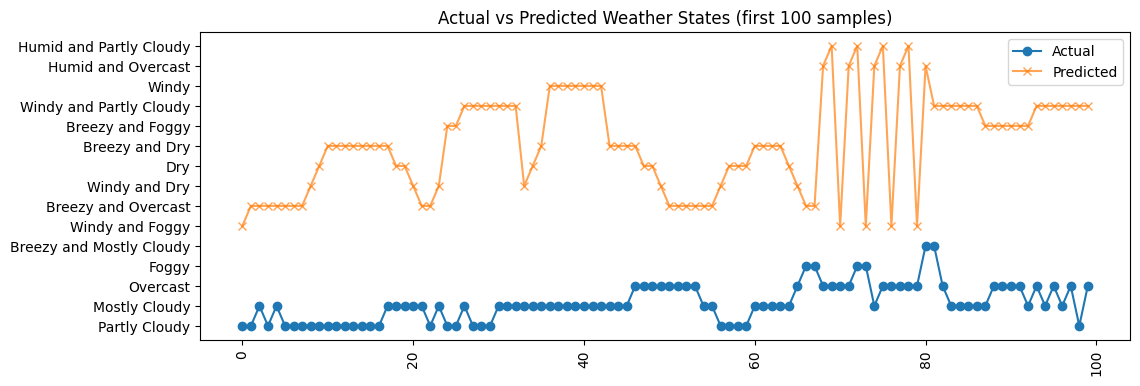

In [30]:
# Step 8: Visualize
plt.figure(figsize=(12,4))
plt.plot(df['Summary'].values[:100], label='Actual', marker='o')
plt.plot(predicted_weather[:100], label='Predicted', marker='x', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Weather States (first 100 samples)')
plt.xticks(rotation=90)
plt.show()